<h1>Bayesian Data Analysis</h1>

<br>

<ul>
    <li><code><b><code>Bayesian Inference</code></b></code> - Updating beliefs as more information becomes available, i.e. updating beliefs about parameters of analysis as more data is collected.</li>
    <br>
    <li><code><b><code>Probability = degree of belief</code></b></code> - Probability is not a statement of proportion of outcomes. Bayesian probability statements refer to belief, e.g. <i>"We are 90% sure that x is +5% better than y"</i>.</li>
    <br>
    <li><code><b><code>Parameters = random variables with distributions</code></b></code> - Parameters for analysis are not fixed and are defined by their own distributions and probabilities, e.g. <i>"The conversion rate of population x is between 9-10%, and between 8-9% for population y"</i>. This equips Bayesian analysis to handle uncertainty by factoring downstream uncertainty inherent in parameters in the end result.</li>
    <br>
    <li><code><b><code>No p-value</code></b></code> - Bayesian analysis does not require a fixed constant that determines an outcome, instead offering degrees of belief and confidence.</li>
    <br>
</ul>

In [13]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# style
from ipynb.fs.full.Style_sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# viz_kde
def viz_kde(ax, data, x, c, title, xlabel, label):
    sns.kdeplot(ax=ax, data=data, x=x, color=c, shade=True, label=label)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.legend()
    return ax

# binomial dist
def dist_bi(d, p, s):
    y = np.random.binomial(d, p, size=s)/100
    df = pd.DataFrame({'Conversion %':y})
    return df

# run samples
np.random.seed(1000)
df = dist_bi(100, 0.33, 10000)
df

,Conversion %
0,0.35
1,0.31
2,0.31
3,0.31
4,0.26
...,...
9995,0.41
9996,0.29
9997,0.34
9998,0.22


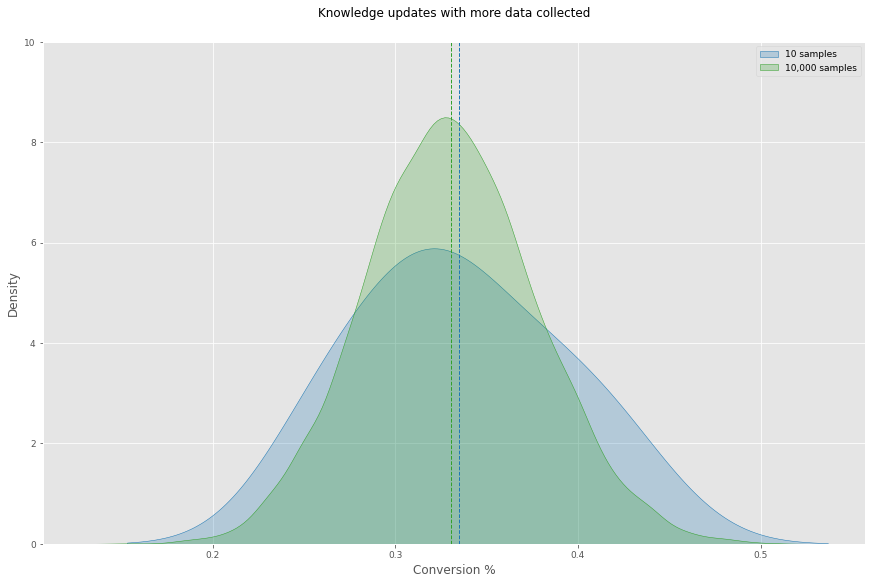

In [15]:
# fig
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(12,8), constrained_layout=True, sharey=True)

# low & high sampling
s_low = df[:10]
s_high = df

# variables
leg = ['10 samples', '10,000 samples']
viz_t = 'Knowledge updates with more data collected'
x = 'Conversion %'

# viz
viz_kde(ax_1, s_low, x, palette_paired[1], '', '', leg[0])
viz_kde(ax_1, s_high, x, palette_paired[3], viz_t, 'Conversion %', leg[1])

# compute mean
s_low_μ = s_low.mean()
s_high_μ = s_high.mean()
ax_1.vlines(x=s_low_μ, ymin=0, ymax=30, linewidth=1, linestyle='--', color=palette_paired[1])
ax_1.vlines(x=s_high_μ, ymin=0, ymax=30, linewidth=1, linestyle='--', color=palette_paired[3])
ax_1.set_ylim(0, 10)

plt.show()